In [17]:
import pandas as pd
from bq_helper import BigQueryHelper

In [18]:
bq_assistant = BigQueryHelper("bigquery-public-data", "github_repos")

Using Kaggle's public dataset BigQuery integration.


In [19]:
%%time
bq_assistant.list_tables()

CPU times: user 16.5 ms, sys: 1.84 ms, total: 18.4 ms
Wall time: 599 ms


['commits',
 'contents',
 'files',
 'languages',
 'licenses',
 'sample_commits',
 'sample_contents',
 'sample_files',
 'sample_repos']

In [20]:
%%time
bq_assistant.table_schema("licenses")

CPU times: user 7.25 ms, sys: 445 µs, total: 7.7 ms
Wall time: 225 ms


,name,type,mode,description
0,repo_name,STRING,NULLABLE,None
1,license,STRING,NULLABLE,None


In [21]:
%%time
bq_assistant.head("licenses", num_rows=10)

CPU times: user 5.56 ms, sys: 1.93 ms, total: 7.49 ms
Wall time: 639 ms


,repo_name,license
0,KarelWintersky/kwERLS4d,artistic-2.0
1,huihui891/LBPLine2,artistic-2.0
2,linzewen/coolweather,artistic-2.0
3,PhantomThief/thrift-pool-client,artistic-2.0
4,xtrujano/codegames,artistic-2.0
5,tokuhirom/HTTP-Tiny,artistic-2.0
6,gitpan/Mojolicious-Plugin-CSSLoader,artistic-2.0
7,xenoterracide/Dist-Zilla-Plugin-Catalyst,artistic-2.0
8,jrouly/hockify,artistic-2.0
9,dmtucker/netsync,artistic-2.0


In [22]:
QUERY = """
        SELECT message
        FROM `bigquery-public-data.github_repos.commits`
        WHERE LENGTH(message) > 6 AND LENGTH(message) <= 20
        LIMIT 2000
        """

In [23]:
%%time
bq_assistant.estimate_query_size(QUERY)

CPU times: user 4.78 ms, sys: 135 µs, total: 4.91 ms
Wall time: 395 ms


21.416058534756303

In [24]:
QUERY = """
        SELECT message
        FROM `bigquery-public-data.github_repos.commits`
        WHERE LENGTH(message) > 6 AND LENGTH(message) <= 20
        LIMIT 4000 -- twice as many commit messages
        """

In [25]:
%%time
bq_assistant.estimate_query_size(QUERY)

CPU times: user 4.76 ms, sys: 130 µs, total: 4.89 ms
Wall time: 560 ms


21.416058534756303

In [26]:
%%time
QUERY = """
        SELECT message
        FROM `bigquery-public-data.github_repos.commits`
        """

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.58 µs


In [27]:
%%time
bq_assistant.estimate_query_size(QUERY)

CPU times: user 5.52 ms, sys: 70 µs, total: 5.59 ms
Wall time: 393 ms


21.416058534756303

In [28]:
QUERY = """
        SELECT message
        FROM `bigquery-public-data.github_repos.commits`
        WHERE LENGTH(message) > 6 AND LENGTH(message) <= 20
        LIMIT 2000
        """

In [29]:
%%time
df = bq_assistant.query_to_pandas_safe(QUERY)

Query cancelled; estimated size of 21.416058534756303 exceeds limit of 1 GB
CPU times: user 3.13 ms, sys: 1.86 ms, total: 4.98 ms
Wall time: 415 ms


In [30]:
QUERY = """
        SELECT license, COUNT(*) AS count
        FROM `bigquery-public-data.github_repos.licenses`
        GROUP BY license
        ORDER BY COUNT(*) DESC
        """

In [31]:
%%time
bq_assistant.estimate_query_size(QUERY)

CPU times: user 2.17 ms, sys: 2.68 ms, total: 4.85 ms
Wall time: 411 ms


0.02417975850403309

In [32]:
%%time
df = bq_assistant.query_to_pandas_safe(QUERY)

CPU times: user 17.6 ms, sys: 2.65 ms, total: 20.2 ms
Wall time: 1.75 s


In [33]:
print('Size of dataframe: {} Bytes'.format(int(df.memory_usage(index=True, deep=True).sum())))

Size of dataframe: 1223 Bytes


In [34]:
df.head()

,license,count
0,mit,1706852
1,apache-2.0,495052
2,gpl-2.0,344504
3,gpl-3.0,342737
4,bsd-3-clause,151968


In [35]:
df.shape

(15, 2)

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

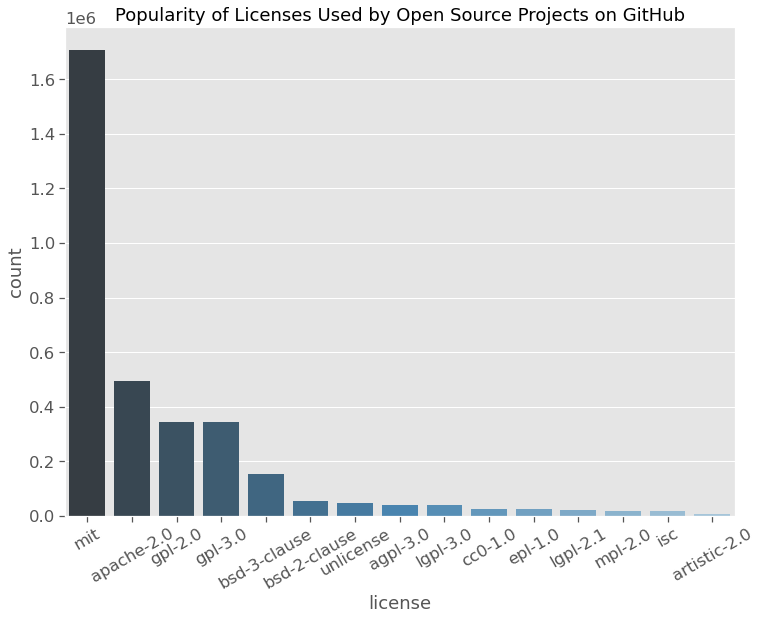

In [37]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

f, g = plt.subplots(figsize=(12, 9))
g = sns.barplot(x="license", y="count", data=df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title("Popularity of Licenses Used by Open Source Projects on GitHub")
plt.show(g)